In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

/home/neha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/neha/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('Dataset/cleaned_train_file.csv')

In [4]:
df.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,4,0,1,2,2,4,33,1,1,2,4,23371,1.8688,4,5,3,0.1841
1,EID_18000,1,3,1,3,3,0,4,36,0,3,2,3,18000,-0.4537,3,5,3,0.0670
2,EID_3891,0,3,0,0,8,2,3,51,0,2,2,4,3891,-0.4537,3,8,3,0.0851
3,EID_17492,0,3,1,2,1,1,3,56,1,3,2,3,17492,-0.4537,3,7,3,0.0668
4,EID_22534,0,1,0,3,3,2,4,62,1,3,3,1,22534,-0.4537,2,8,2,0.1827


In [5]:
df.shape

(7000, 19)

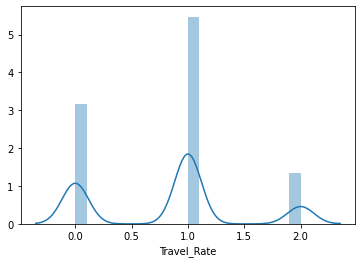

In [8]:
sns.distplot(df['Travel_Rate'])

In [11]:
y = df['Attrition_rate']
data = df.drop('Attrition_rate',axis=1)

In [12]:
data.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7
0,EID_23371,0,4,0,1,2,2,4,33,1,1,2,4,23371,1.8688,4,5,3
1,EID_18000,1,3,1,3,3,0,4,36,0,3,2,3,18000,-0.4537,3,5,3
2,EID_3891,0,3,0,0,8,2,3,51,0,2,2,4,3891,-0.4537,3,8,3
3,EID_17492,0,3,1,2,1,1,3,56,1,3,2,3,17492,-0.4537,3,7,3
4,EID_22534,0,1,0,3,3,2,4,62,1,3,3,1,22534,-0.4537,2,8,2


In [13]:
# Standardised Dataset
data.iloc[:,1:] = (data.iloc[:,1:]-data.iloc[:,1:].mean())/data.iloc[:,1:].std()

In [14]:
data.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Compensation_and_Benefits,VAR1,VAR2,VAR3,VAR5,VAR6,VAR7
0,EID_23371,-0.837500,0.762502,-0.740671,-1.006407,-0.872163,0.445880,1.420623,-0.892324,0.280996,-1.545044,-0.505523,1.077778,1.378503,1.907330,1.241667,-1.804822,-0.277742
1,EID_18000,1.193859,-0.176375,1.349933,0.692170,-0.574366,-1.341214,1.420623,-0.701986,-1.261726,0.173581,-0.505523,-0.117855,0.631953,-0.445921,0.176642,-1.804822,-0.277742
2,EID_3891,-0.837500,-0.176375,-0.740671,-1.855696,0.914620,0.445880,0.550600,0.249706,-1.261726,-0.685731,-0.505523,1.077778,-1.329149,-0.445921,0.176642,0.771917,-0.277742
3,EID_17492,-0.837500,-0.176375,1.349933,-0.157118,-1.169960,-0.447667,0.550600,0.566936,0.280996,0.173581,-0.505523,-0.117855,0.561343,-0.445921,0.176642,-0.086996,-0.277742
4,EID_22534,-0.837500,-2.054128,-0.740671,0.692170,-0.574366,0.445880,1.420623,0.947613,0.280996,0.173581,0.865520,-2.509121,1.262163,-0.445921,-0.888383,0.771917,-1.358450


In [17]:
train_x, test_x , train_y, test_y = train_test_split(data,y,test_size= 0.20, random_state=70)

In [18]:
lr = LinearRegression()

In [20]:
lr.fit(train_x.iloc[:,1:],train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lr.coef_

array([ 6.22364414e-03, -2.28989998e-03,  2.76190292e-03,  1.32792488e-03,
        4.34771393e-03,  2.65141268e-03,  6.93733842e-04,  3.11320806e-03,
       -1.13611602e-03,  1.92431377e-03, -4.60529132e-03, -1.56800773e-03,
        4.48037056e-04,  7.34534140e-05, -4.16697889e-03,  7.50030939e-05,
       -3.94678003e-03])

In [21]:
pred = lr.predict(test_x.iloc[:,1:])

In [1]:
from sklearn.metrics import mean_squared_error

import numpy as np

In [29]:
pred = np.round(pred,4)

In [31]:
pred[:5]

array([0.2002, 0.199 , 0.1683, 0.1789, 0.1733])

In [33]:
test= pd.read_csv('Dataset/cleaned_test_file.csv')

In [34]:
# Standardise test dataset
test.iloc[:,1:]= (test.iloc[:,1:]-test.iloc[:,1:].mean())/test.iloc[:,1:].std()

In [35]:
test_pred = lr.predict(test.iloc[:,1:])

In [36]:
test_pred = np.round(test_pred,4)

In [37]:
new_df = pd.DataFrame()

In [38]:
new_df['Employee_ID']= test['Employee_ID']
new_df['Attrition_rate'] = test_pred

In [39]:
new_df.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.1978
1,EID_9658,0.2112
2,EID_22203,0.2026
3,EID_7652,0.2051
4,EID_6516,0.1868


In [40]:
new_df.to_csv('Submission_file1.csv',index=False)